In [98]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('GlobalTemperatures.csv')

data.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [99]:
data = data.iloc[:,0:2]
data = data.dropna()
data = data.rename(columns={'dt':'Date'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3180 entries, 0 to 3191
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    3180 non-null   object 
 1   LandAverageTemperature  3180 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.5+ KB


In [100]:
data['Date'] = pd.to_datetime(data['Date'])

In [101]:
ts_data = data.set_index(['Date'])
ts_data.tail()

,LandAverageTemperature
Date,
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801
2015-11-01,7.433
2015-12-01,5.518


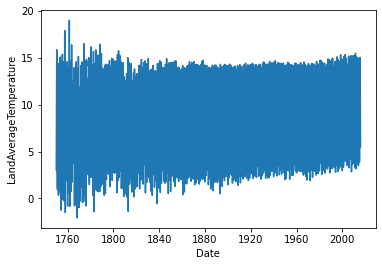

In [102]:
plt.xlabel("Date")
plt.ylabel("LandAverageTemperature")
plt.plot(ts_data)

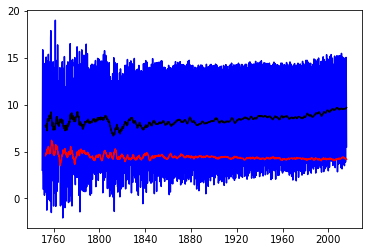

In [103]:
rol_mean = ts_data.rolling(window=24).mean()
rol_std = ts_data.rolling(window=24).std()

plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

In [104]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ts_data, autolag='AIC')
print(f'ADF Statistic:{adf_result[0]}')
print(f'p-value:{adf_result[1]}')

for percentage,value in adf_result[4].items():
    print("Critical Value:")
    print(f'{percentage}{value}')

ADF Statistic:-3.991677574351494
p-value:0.0014547223819061268
Critical Value:
1%-3.432427002601706
Critical Value:
5%-2.8624576920765237
Critical Value:
10%-2.5672585088743345


C:\Users\Parthiv\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


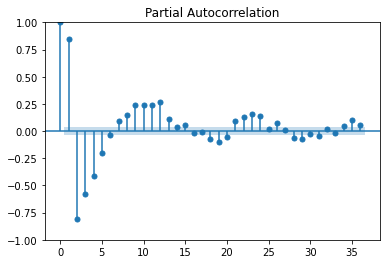

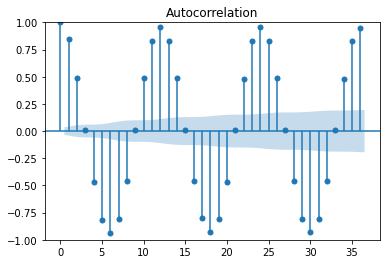

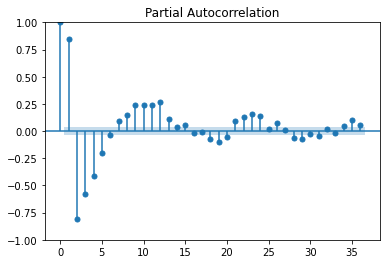

In [105]:
#plot ACF and PACF graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_data)
plot_pacf(ts_data)

In [106]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data, order=(1,0,1))
res = model.fit()



C:\Users\Parthiv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parthiv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parthiv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [108]:
predictions = res.predict(start = '01/01/1990',end = '01/01/1991')

In [112]:
actuals = ts_data['01/01/1990':'01/01/1991']['LandAverageTemperature'][0:15]
actuals

Date
1990-01-01     3.243
1990-02-01     3.643
1990-03-01     6.730
1990-04-01     9.169
1990-05-01    11.831
1990-06-01    13.893
1990-07-01    14.784
1990-08-01    14.095
1990-09-01    12.195
1990-10-01     9.882
1990-11-01     6.920
1990-12-01     4.425
1991-01-01     3.195
Name: LandAverageTemperature, dtype: float64

In [113]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13],predictions)
print(f'MAE:{mae}')

MAE:1.271639256077317
